In [1]:
# import modules
import os
import csv
import pandas as pd
import numpy as np
# import scimpy 
from scipy import stats

# import modules for visualization
import matplotlib.pyplot as plt
import hvplot.pandas
import holoviews as hv
from holoviews import opts

In [2]:
# create an Airbnb dataframe
airbnb_df = pd.read_csv('Resources/air bnb csv with edits.csv')
airbnb_df.head()

,id,name,host_id,host_name,host_since,host_is_superhost,host_identity_verified,instant_bookable,accommodates,amenities,...,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,27-06-2008,f,t,f,6,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""...",...,2.0,3.0,115,30,730,2,15-05-2016,0.02,1,216
1,2708,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,3008,Chas.,16-09-2008,t,t,t,1,"[""Host greets you"", ""Elevator"", ""Air condition...",...,1.0,1.0,71,30,366,27,6/10/2020,0.35,2,360
2,2732,Zen Life at the Beach,3041,Yoga Priestess,17-09-2008,f,t,f,1,"[""Cooking basics"", ""Host greets you"", ""Smoke a...",...,1.0,1.0,155,1,180,21,27-12-2019,0.18,2,337
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,25-09-2008,f,t,t,2,"[""Host greets you"", ""Air conditioning"", ""Carbo...",...,1.0,1.0,50,30,730,0,NaN,NaN,1,0
4,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,5/3/2009,t,t,f,2,"[""Lock on bedroom door"", ""Fire extinguisher"", ...",...,1.0,1.0,60,30,1125,310,29-04-2020,2.25,5,337


In [3]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'instant_bookable', 'accommodates',
       'amenities', 'State', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [4]:
# how many hosts are represented in the data
airbnb_df['host_id'].nunique()

86089

In [5]:
# cities that are represented in the data
cities = airbnb_df["neighbourhood_group"].unique()
cities

array(['Los Angeles', 'San Diego County', 'San Francisco', 'San Mateo',
       'Saint Clara County', ' Santa Cruz', 'Chicago', 'Broward County',
       'Hawaii', 'Kauai', 'Maui', 'Honolulu', 'Clark County', 'Manhattan',
       'Brooklyn', 'Queens', 'Staten Island', 'Bronx', 'Nashville',
       'Washington D.C', 'Seattle'], dtype=object)

In [6]:
cities_count = airbnb_df["neighbourhood_group"].nunique()
cities_count

21

In [7]:
import re
import json
from collections import Counter

# Load the CSV file with a relative path
file_path = 'Resources/air bnb csv with edits.csv'  # Relative path to the CSV file
df = pd.read_csv(file_path)

# Function to clean and parse the amenities column
def clean_and_parse_amenities(amenities_str):
    try:
        cleaned_str = re.sub(r'(\w+):', r'"\1":', amenities_str).replace("'", '"')
        return json.loads(cleaned_str)
    except (json.JSONDecodeError, ValueError):
        return []

# Apply the parsing function and flatten the list of amenities
all_amenities = [item for sublist in df['amenities'].apply(lambda x: clean_and_parse_amenities(x) if isinstance(x, str) else []) for item in sublist]

# Count the frequency of each unique amenity
amenities_counter = Counter(all_amenities)

# Get the 10 most common amenities
most_common_amenities = amenities_counter.most_common(10)

# Print the most popular amenities
print("The most popular amenities are:")
for amenity, count in most_common_amenities:
    print(f"{amenity}: {count} listings")


The most popular amenities are:
Wifi: 153989 listings
Essentials: 146827 listings
Smoke alarm: 144300 listings
Kitchen: 139559 listings
Hangers: 132614 listings
TV: 130571 listings
Heating: 126875 listings
Hair dryer: 124915 listings
Iron: 120742 listings
Air conditioning: 120480 listings


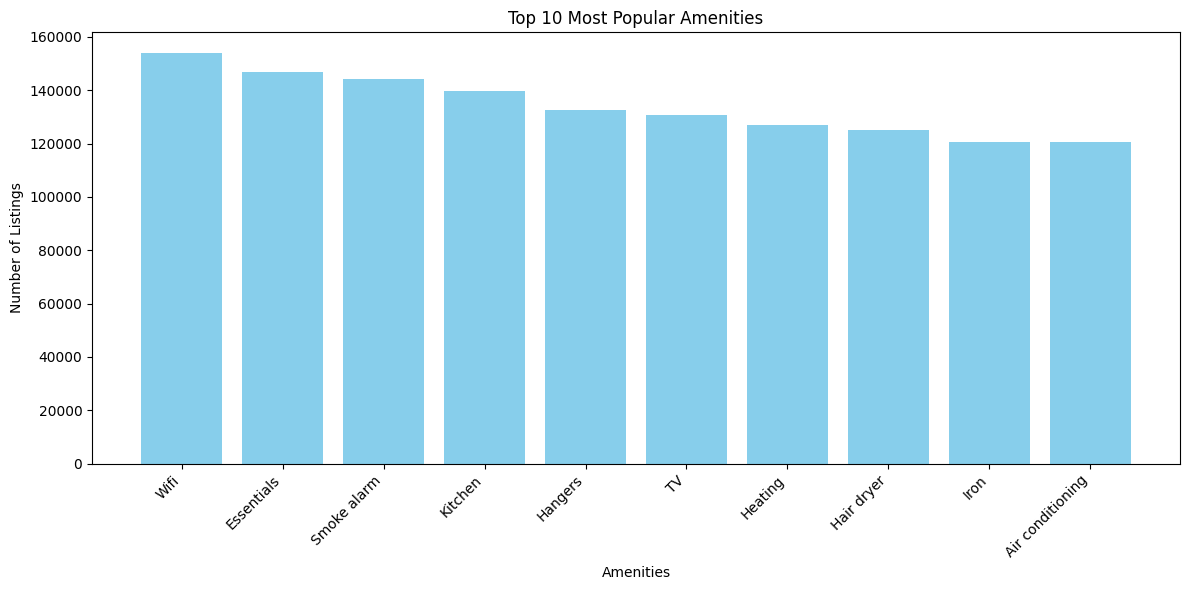

In [8]:
import matplotlib.pyplot as plt

# Extract amenities and their counts for visualization
amenities = [amenity for amenity, count in most_common_amenities]
counts = [count for amenity, count in most_common_amenities]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(amenities, counts, color='skyblue')
plt.title('Top 10 Most Popular Amenities')
plt.xlabel('Amenities')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping

# Save plot as image file
plt.savefig("output_data/Fig2.png")

# Display the chart
plt.show()

Basic Amenities:
- Air conditioning: 120593 occurrences
- Kitchen: 139694 occurrences
- Heating: 126927 occurrences
- TV: 130640 occurrences
- Essentials: 146865 occurrences

Luxury Amenities:
- Pool: 41242 occurrences
- Gym: 29231 occurrences
- Hot tub: 26040 occurrences
- Sauna: 15 occurrences
- Outdoor dining area: 2 occurrences

Safety Amenities:
- Carbon monoxide alarm: 114107 occurrences
- Fire extinguisher: 87878 occurrences
- First aid kit: 66955 occurrences
- Smoke alarm: 144341 occurrences



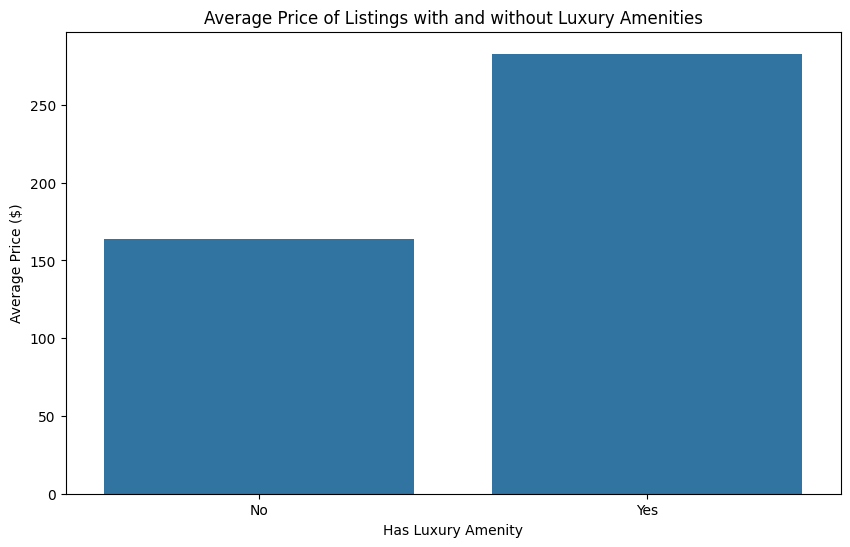

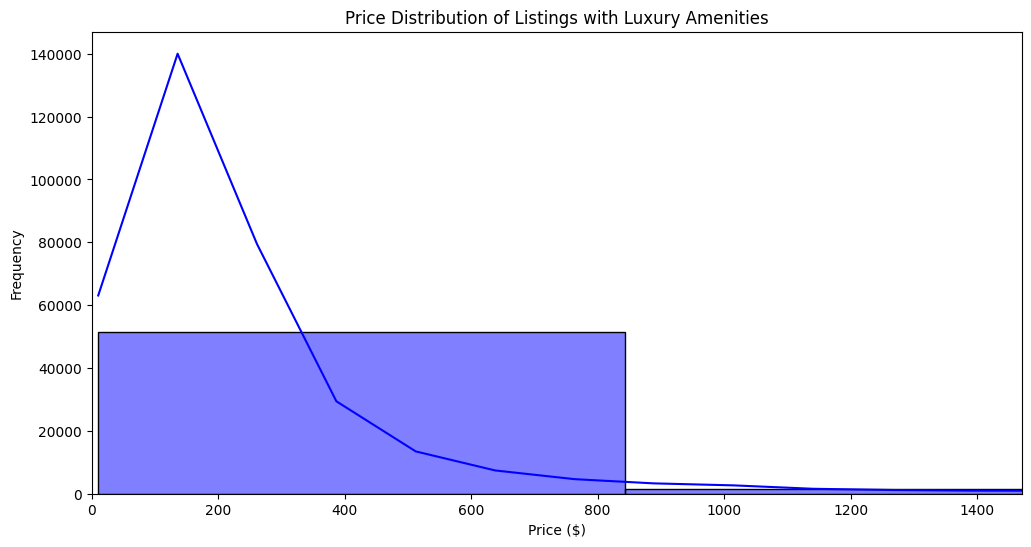

In [9]:
# Import necessary libraries
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Resources/air bnb csv with edits.csv'
data = pd.read_csv(file_path)

# Extract amenities and clean the data
data['amenities'] = data['amenities'].apply(lambda x: x.strip('[]').replace('"', '').split(', '))
amenities_list = [amenity for sublist in data['amenities'] for amenity in sublist]

# Count the frequency of each amenity
amenities_count = Counter(amenities_list)

# Grouping amenities into categories
basic_amenities = ['WiFi', 'Kitchen', 'Heating', 'Air conditioning', 'TV', 'Essentials']
luxury_amenities = ['Hot tub', 'Pool', 'Sauna', 'Gym', 'Jacuzzi', 'Outdoor dining area']
safety_amenities = ['Smoke alarm', 'Carbon monoxide alarm', 'Fire extinguisher', 'First aid kit']

# Create a dictionary to store categorized amenities
categorized_amenities = {
    'Basic': {amenity: count for amenity, count in amenities_count.items() if amenity in basic_amenities},
    'Luxury': {amenity: count for amenity, count in amenities_count.items() if amenity in luxury_amenities},
    'Safety': {amenity: count for amenity, count in amenities_count.items() if amenity in safety_amenities}
}

# Analyze impact of luxury amenities on price
data['price'] = pd.to_numeric(data['price'].replace('[\$,]', '', regex=True))
data['has_luxury_amenity'] = data['amenities'].apply(lambda x: any(amenity in luxury_amenities for amenity in x))

# Compare average price of listings with and without luxury amenities
luxury_price_analysis = data.groupby('has_luxury_amenity')['price'].mean().reset_index()

# Display the categorized amenities
for category, amenities in categorized_amenities.items():
    print(f"{category} Amenities:")
    for amenity, count in amenities.items():
        print(f"- {amenity}: {count} occurrences")
    print()

# Plot the analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='has_luxury_amenity', y='price', data=luxury_price_analysis)
plt.title('Average Price of Listings with and without Luxury Amenities')
plt.xlabel('Has Luxury Amenity')
plt.ylabel('Average Price ($)')
plt.xticks([0, 1], ['No', 'Yes'])

# Save plot as image file
plt.savefig("output_data/Fig4.png")

plt.show()

# Visualize the price distribution for listings with luxury amenities
plt.figure(figsize=(12, 6))
sns.histplot(data[data['has_luxury_amenity'] == True]['price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution of Listings with Luxury Amenities')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, data['price'].quantile(0.99))  # Set x-axis to show relevant price range up to the 99th percentile

# Save plot as image file
plt.savefig("output_data/Fig5.png")

plt.show()



In [10]:
# Statistical analysis of price trends
luxury_prices = data[data['has_luxury_amenity'] == True]['price']
non_luxury_prices = data[data['has_luxury_amenity'] == False]['price']

# Perform t-test to compare means of listings with and without luxury amenities
t_stat, p_value = stats.ttest_ind(luxury_prices, non_luxury_prices, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in average price between listings with and without luxury amenities is statistically significant.")
else:
    print("The difference in average price between listings with and without luxury amenities is not statistically significant.")
    


T-statistic: 38.39
P-value: 0.0000
The difference in average price between listings with and without luxury amenities is statistically significant.


Neighborhoods with the Most Luxury Amenities:
            neighbourhood  total_luxury_amenities  luxury_amenity_percentage
456             Las Vegas                    6502                  71.013543
427          Kihei-Makena                    3447                  95.089655
443               Lahaina                    3093                  94.241316
672  Primary Urban Center                    2932                  67.542041
390             Hollywood                    2388                  54.770642
314       Fort Lauderdale                    1594                  67.743306
593            North Kona                    1405                  71.756895
600     North Shore Kauai                     918                  74.392220
768          South Kohala                     908                  86.229820
236              Downtown                     825                  75.757576
Neighborhoods with the Highest Prices:
            neighbourhood  average_price
705         Rolling Hills  

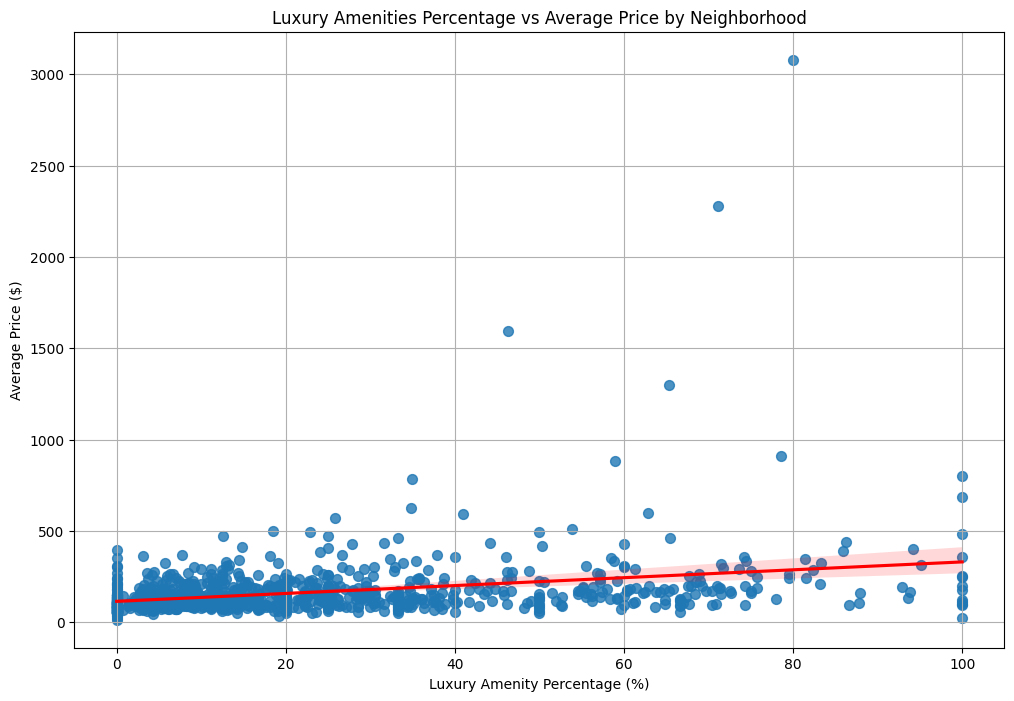

Number of neighborhoods that are both in the top 10 highest priced and top 10 with most luxury amenities:
0
There are no neighborhoods that are both in the top 10 highest priced and top 10 with most luxury amenities.
Detailed Neighborhood Luxury Comparison:
          neighbourhood  total_luxury_amenities  luxury_amenity_percentage  \
0             Las Vegas                    6502                  71.013543   
1          Kihei-Makena                    3447                  95.089655   
2               Lahaina                    3093                  94.241316   
3  Primary Urban Center                    2932                  67.542041   
4             Hollywood                    2388                  54.770642   
5       Fort Lauderdale                    1594                  67.743306   
6            North Kona                    1405                  71.756895   
7     North Shore Kauai                     918                  74.392220   
8          South Kohala                 

In [11]:
# Analysis of neighborhoods and luxury amenities
# Group by neighborhood to analyze luxury amenities and prices by area
neighborhood_luxury_analysis = data.groupby('neighbourhood').agg(
    total_luxury_amenities=('has_luxury_amenity', 'sum'),
    average_price=('price', 'mean'),
    total_listings=('neighbourhood', 'size')
).reset_index()

# Calculate the percentage of listings with luxury amenities
neighborhood_luxury_analysis['luxury_amenity_percentage'] = (
    neighborhood_luxury_analysis['total_luxury_amenities'] / neighborhood_luxury_analysis['total_listings'] * 100
)

# Sort neighborhoods by total luxury amenities and average price
neighborhoods_most_luxury = neighborhood_luxury_analysis.sort_values(by='total_luxury_amenities', ascending=False)
neighborhoods_highest_prices = neighborhood_luxury_analysis.sort_values(by='average_price', ascending=False)

# Display the neighborhoods with the most luxury amenities and highest prices
print("Neighborhoods with the Most Luxury Amenities:")
print(neighborhoods_most_luxury[['neighbourhood', 'total_luxury_amenities', 'luxury_amenity_percentage']].head(10))

print("Neighborhoods with the Highest Prices:")
print(neighborhoods_highest_prices[['neighbourhood', 'average_price']].head(10))

# Visualize the relationship between luxury amenities and average price by neighborhood with regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='luxury_amenity_percentage', y='average_price', data=neighborhood_luxury_analysis, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Luxury Amenities Percentage vs Average Price by Neighborhood')
plt.xlabel('Luxury Amenity Percentage (%)')
plt.ylabel('Average Price ($)')
plt.grid(True)

# Save plot as image file
plt.savefig("output_data/Fig6.png")

plt.show()

# Statistical correlation analysis between highest priced neighborhoods and neighborhoods with most luxury amenities
highest_price_neighborhoods = neighborhoods_highest_prices.head(10)['neighbourhood']
most_luxury_neighborhoods = neighborhoods_most_luxury.head(10)['neighbourhood']

# Calculate intersection of both sets
intersection_neighborhoods = set(highest_price_neighborhoods).intersection(set(most_luxury_neighborhoods))
intersection_count = len(intersection_neighborhoods)

print("Number of neighborhoods that are both in the top 10 highest priced and top 10 with most luxury amenities:")
print(intersection_count)

if intersection_count > 0:
    print("Neighborhoods that are both in the top 10 highest priced and top 10 with most luxury amenities:")
    print(intersection_neighborhoods)
else:
    print("There are no neighborhoods that are both in the top 10 highest priced and top 10 with most luxury amenities.")

# Detailed neighborhood luxury comparison
# Merge the luxury and price rankings into a comprehensive comparison dataframe
luxury_price_comparison = pd.merge(
    neighborhoods_most_luxury[['neighbourhood', 'total_luxury_amenities', 'luxury_amenity_percentage']],
    neighborhoods_highest_prices[['neighbourhood', 'average_price']],
    on='neighbourhood',
    suffixes=('_luxury', '_price')
)

# Display detailed comparison for top neighborhoods
print("Detailed Neighborhood Luxury Comparison:")
print(luxury_price_comparison[['neighbourhood', 'total_luxury_amenities', 'luxury_amenity_percentage', 'average_price']].head(10))
